### LOGISTIC REGRESSION

#### 1. Data Exploration:

In [ ]:
# imported libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##### Read the data

In [ ]:
titanic_train = pd.read_csv('Titanic_train.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_train.info()  # shows the data structure,datatypes,total records,columns,non null records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_train.nunique() # shows how many unique values are there

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
titanic_train.isnull().sum()   # shows total null values each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_train[titanic_train.duplicated(keep=False)] ## shows Duplicate values # no duplicates

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
# preprocess the data
df = titanic_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)   #Drop columns that are not needed for prediction

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

#### Visulazation

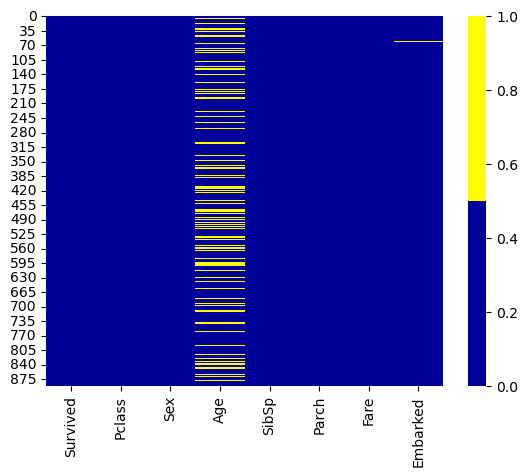

In [ ]:
# specify the colours - yellow is missing. blue is not missing.
colours = ['#000099', '#ffff00']
pal = sns.color_palette(colours)
# heatmap for visualization
sns.heatmap(df.isnull(),
            cmap=pal)
plt.show()

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


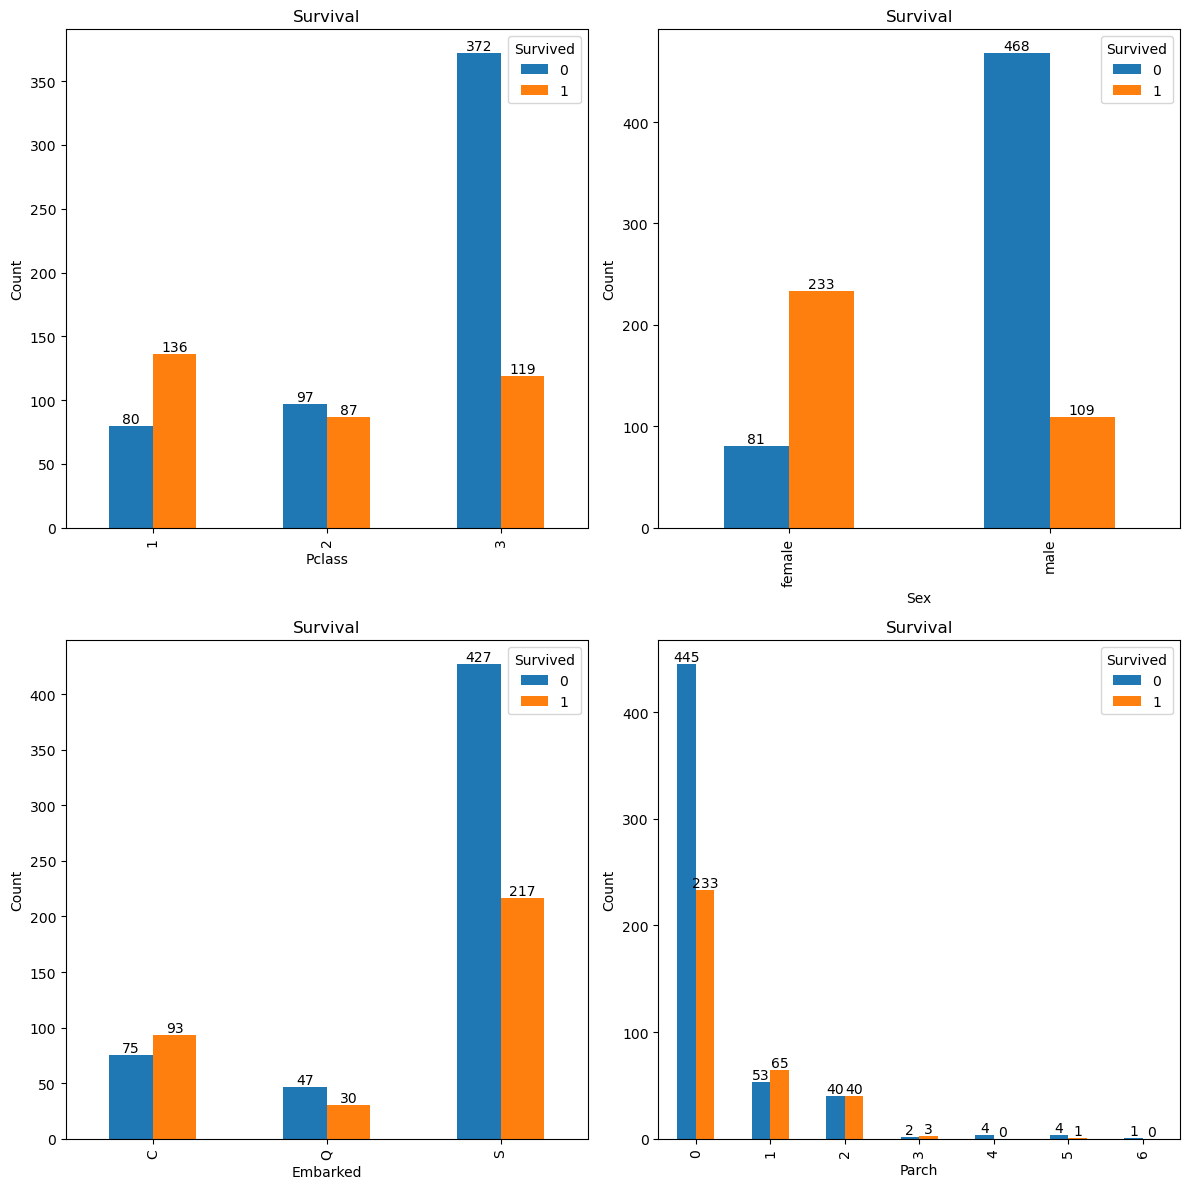

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

ct1 = pd.crosstab(df.Pclass, df.Survived)
# Plotting the bar plot
ax1 = ct1.plot(kind='bar', ax=axes[0,0])               # # Plot 1: Pclass vs Survived
axes[0,0].set_title('Survival')
axes[0,0].set_xlabel('Pclass')
axes[0,0].set_ylabel('Count')
# Adding data labels
for container in ax1.containers:
    ax1.bar_label(container)

# Creating the crosstab
ct2 = pd.crosstab(df.Sex, df.Survived)
# Plotting the bar plot
ax2 = ct2.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Survival')                               ## Plot 2: Sex vs Survived
axes[0,1].set_xlabel('Sex')
axes[0,1].set_ylabel('Count')
# Adding data labels
for container in ax2.containers:
    ax2.bar_label(container)

# Creating the crosstab
ct3 = pd.crosstab(df.Embarked, df.Survived)                         # Plot 3: Embarked vs Survived
# Plotting the bar plot
ax3 = ct3.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Survival')
axes[1,0].set_xlabel('Embarked')
axes[1,0].set_ylabel('Count')
# Adding data labels
for container in ax3.containers:
    ax3.bar_label(container)

# Creating the crosstab
ct4 = pd.crosstab(df.Parch, df.Survived)                         # Plot 4: Parch vs Survived
# Plotting the bar plot
ax4 = ct4.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Survival')
axes[1,1].set_xlabel('Parch')
axes[1,1].set_ylabel('Count')
# Adding data labels
for container in ax4.containers:
    ax4.bar_label(container)

plt.tight_layout()
plt.show()

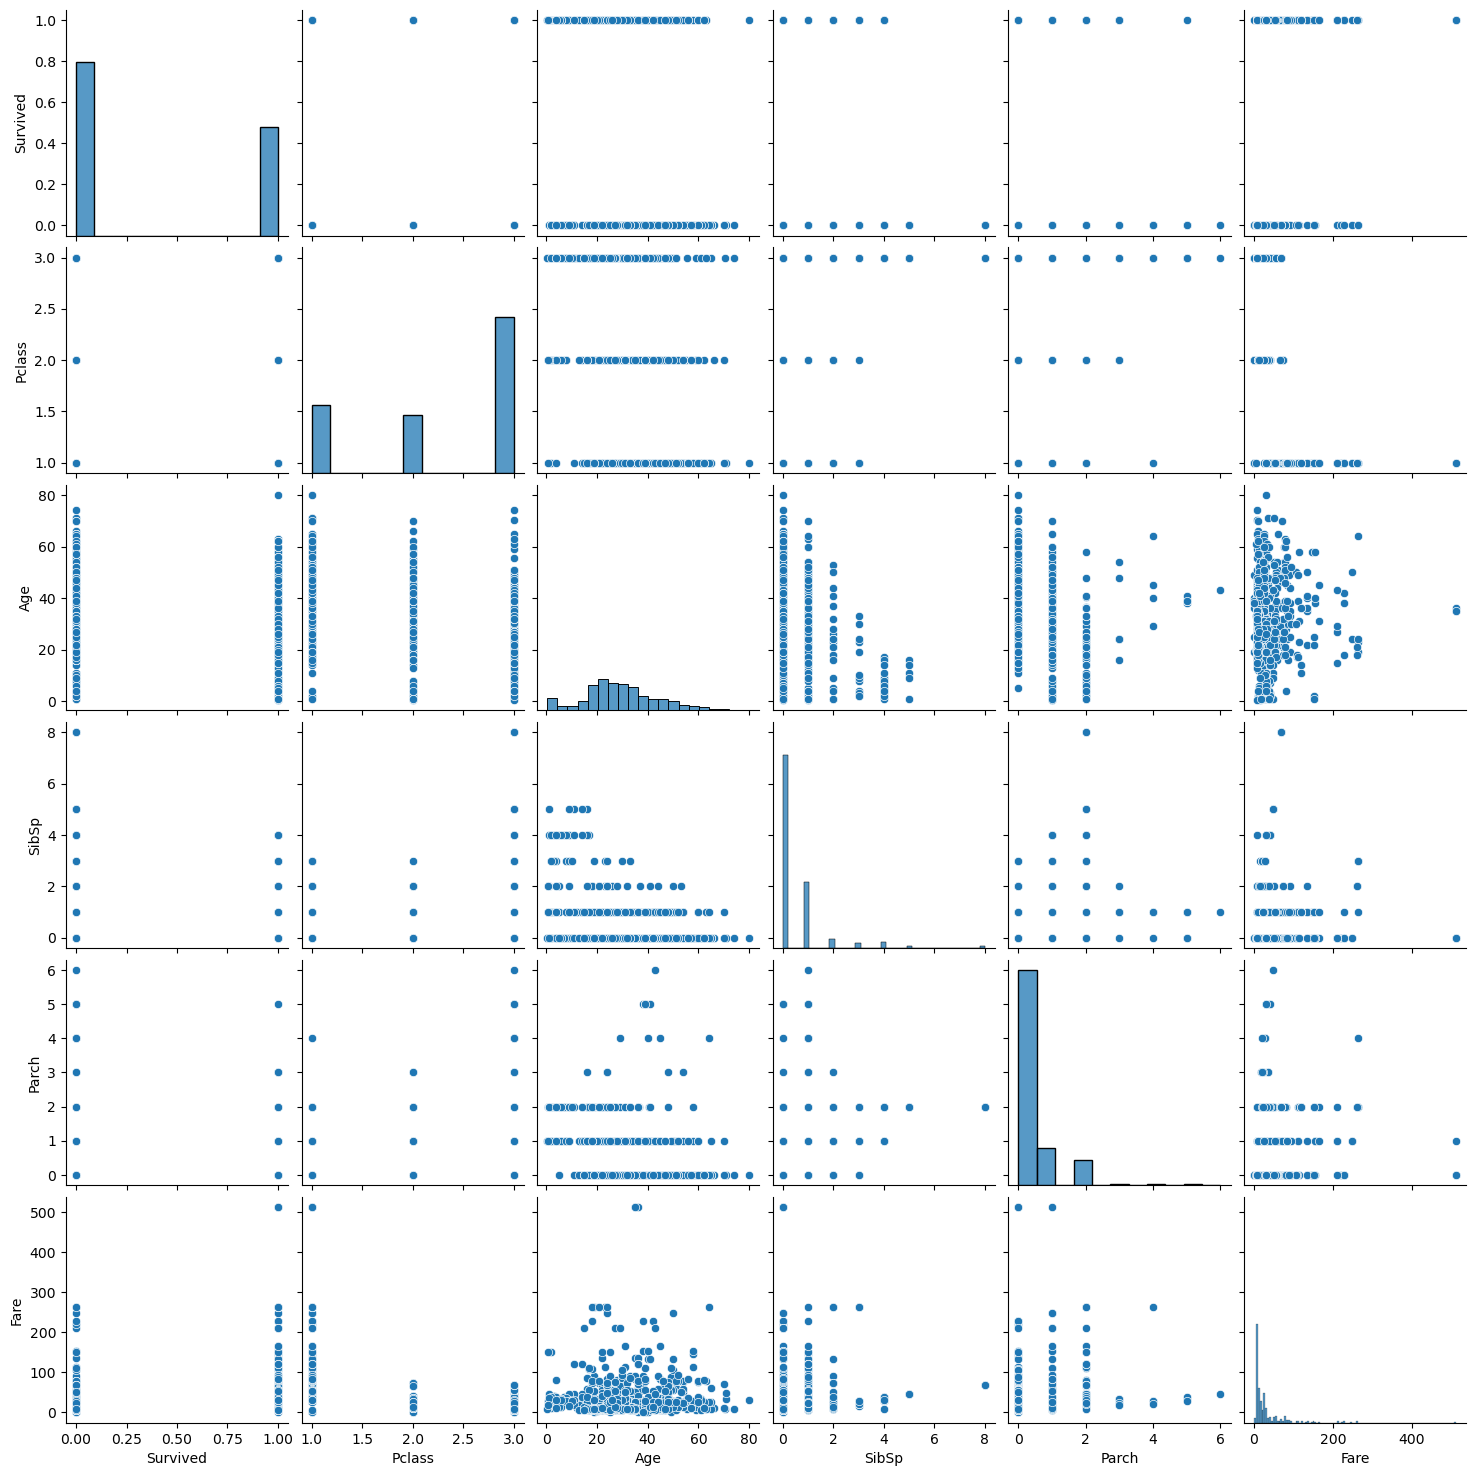

In [ ]:
import warnings
# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.pairplot(df)
plt.show()

In [ ]:
df.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


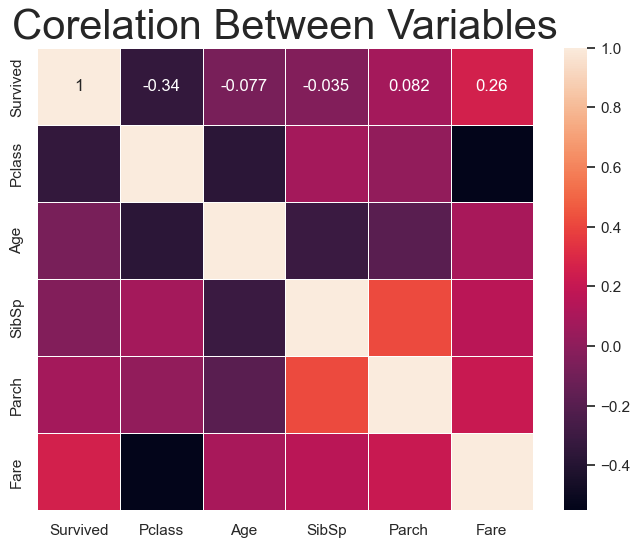

In [ ]:
# correlation heatmaps to explore relationships between pairs of variables.
sns.set(style="white")
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(df.corr(numeric_only=True), annot = True, linewidths=.5)
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

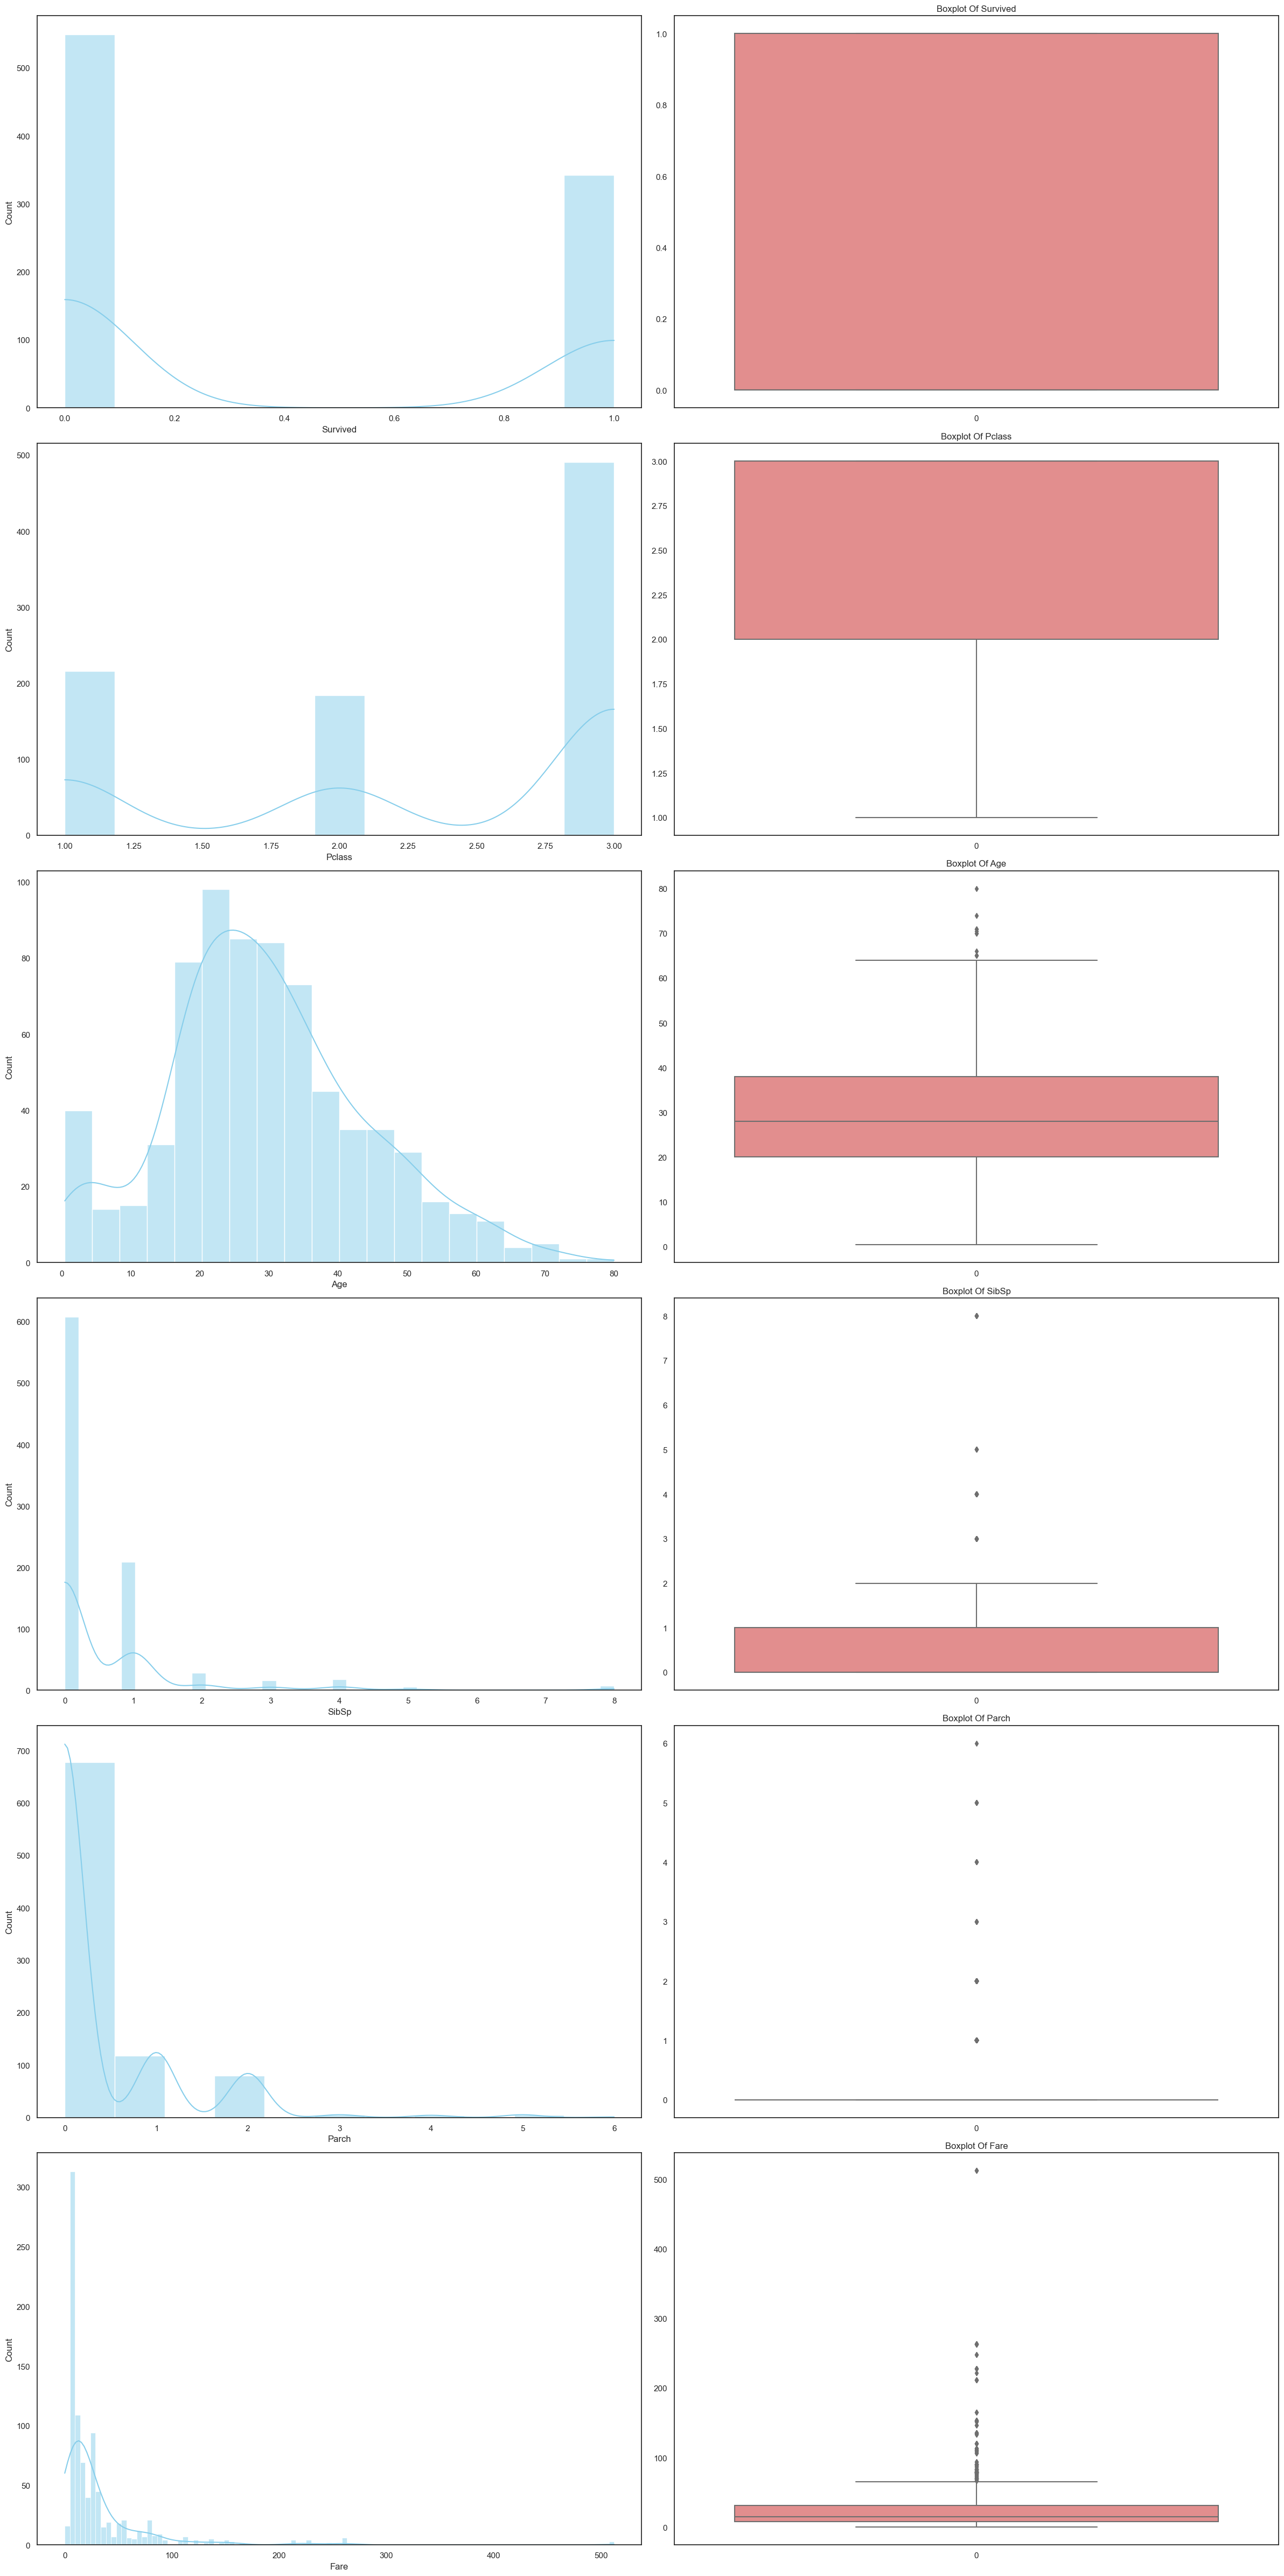

In [ ]:
w

In [ ]:
# preprocess the data
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True,dtype= float)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


#### Model Building

In [ ]:
# Split the data into features and target
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
# import the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) # splited into 80% and 20% , random state for keep same records
model = LogisticRegression(max_iter=1000)  # Train the logistic regression model
model.fit(X_train, y_train)    # fit the model on training data
yhat_train = model.predict(X_train)     # predictions on training data

#####  Evaluate the model

In [ ]:
conf_matrix = confusion_matrix(y_train, yhat_train)
conf_matrix

array([[385,  59],
       [ 83, 185]], dtype=int64)

In [ ]:
class_report = classification_report(y_train, yhat_train)
print(class_report)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       444
           1       0.76      0.69      0.72       268

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.80      0.80      0.80       712



In [ ]:
# model paerameters
print("Coef : ",model.coef_)
print("Intercept : ",model.intercept_)

Coef :  [[-9.38015443e-01 -3.05757572e-02 -2.95182453e-01 -1.08331170e-01
   2.57852318e-03 -2.59158961e+00 -1.12683196e-01 -3.99743893e-01]]
Intercept :  [4.53507607]


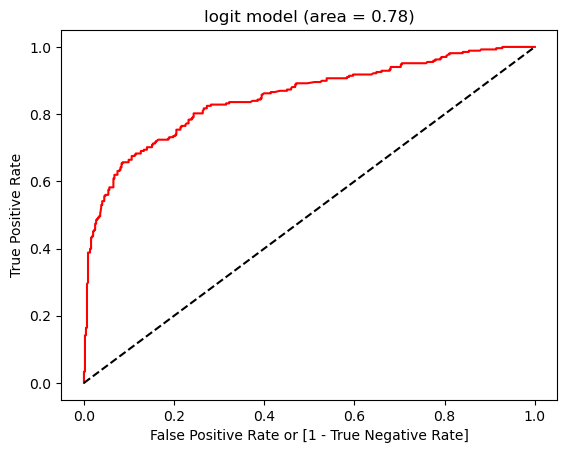

In [ ]:
# Visualize ROC curve
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:,1])
pd.DataFrame({'False Positive Rate': fpr,
             'True Positive Rate': tpr,
             'Thresholds': thresholds})

plt.plot(fpr, tpr, color = 'red') #label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('logit model (area = %0.2f)'%roc_auc_score(y_train, yhat_train))
plt.show()

In [ ]:
#accuracy = accuracy_score(y_train, yhat_train)

In [ ]:
probt = pd.Series(model.predict_proba(X_train)[:,1]) # predict probabilities of each record
yhat_thr035 = probt.apply(lambda p : 1 if p > 0.35 else 0)     # function to set threshold
confusion_matrix(y_train,yhat_thr035)                                # confusion matrix

array([[348,  96],
       [ 64, 204]], dtype=int64)

In [ ]:
yhat_test = model.predict(X_test)     # predictions on training data
conf_matrix = confusion_matrix(y_test, yhat_test)
class_report = classification_report(y_test, yhat_test)
print(conf_matrix)
print(class_report)

[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



#### predict for testing data

In [ ]:
titanic_test = pd.read_csv('Titanic_test.csv')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
titanic_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
titanic_test['Age'].fillna(titanic_test['Age'].median(), inplace=True)
titanic_test['Fare'].fillna(titanic_test['Fare'].median(), inplace=True)
titanic_test['Embarked'].fillna(titanic_test['Embarked'].mode()[0], inplace=True)

In [ ]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [ ]:
titanic_test = pd.get_dummies(titanic_test, columns=['Sex', 'Embarked'], drop_first=True, dtype= float)
titanic_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1.0,1.0,0.0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0
2,2,62.0,0,0,9.6875,1.0,1.0,0.0
3,3,27.0,0,0,8.6625,1.0,0.0,1.0
4,3,22.0,1,1,12.2875,0.0,0.0,1.0


In [ ]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Sex_male    418 non-null    float64
 6   Embarked_Q  418 non-null    float64
 7   Embarked_S  418 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 26.3 KB


In [ ]:
yhat_test = model.predict(titanic_test) # predictions for testing data

In [ ]:
prob = pd.Series(model.predict_proba(titanic_test)[:,1])

In [ ]:
model.predict_proba(titanic_test)

array([[0.88266565, 0.11733435],
       [0.59698243, 0.40301757],
       [0.87168558, 0.12831442],
       [0.88830198, 0.11169802],
       [0.43124113, 0.56875887],
       [0.84218517, 0.15781483],
       [0.32943404, 0.67056596],
       [0.81091927, 0.18908073],
       [0.23338294, 0.76661706],
       [0.91986309, 0.08013691],
       [0.88849798, 0.11150202],
       [0.67562022, 0.32437978],
       [0.08233633, 0.91766367],
       [0.9232043 , 0.0767957 ],
       [0.16481703, 0.83518297],
       [0.15426642, 0.84573358],
       [0.74716225, 0.25283775],
       [0.81668103, 0.18331897],
       [0.44497557, 0.55502443],
       [0.41005198, 0.58994802],
       [0.69385705, 0.30614295],
       [0.83830102, 0.16169898],
       [0.07918535, 0.92081465],
       [0.39811712, 0.60188288],
       [0.10103398, 0.89896602],
       [0.95507886, 0.04492114],
       [0.04852762, 0.95147238],
       [0.82344795, 0.17655205],
       [0.6385864 , 0.3614136 ],
       [0.90296131, 0.09703869],
       [0.

In [ ]:
def get_class(prob):
    if prob > 0.35:
        return 1
    else:
        return 0


In [ ]:
prob.apply(get_class)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Length: 418, dtype: int64

In [ ]:
titanic_test['Survived']= prob.apply(get_class)
titanic_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,3,34.5,0,0,7.8292,1.0,1.0,0.0,0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0,1
2,2,62.0,0,0,9.6875,1.0,1.0,0.0,0
3,3,27.0,0,0,8.6625,1.0,0.0,1.0,0
4,3,22.0,1,1,12.2875,0.0,0.0,1.0,1
